In [1]:
import torch

In [2]:
from torch.autograd import Variable

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)

In [6]:
y = x.pow(2)+0.2*torch.rand(x.size())

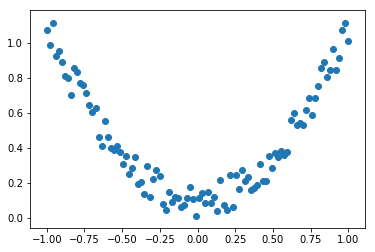

In [7]:
plt.scatter(x,y)

In [20]:
x,y=torch.autograd.Variable(x),Variable(y)

In [10]:
import torch.nn.functional as F

In [21]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x        

In [22]:
net= Net(1,10,1)

In [23]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)


In [24]:
optimizer = torch.optim.SGD(net.parameters(),lr = 0.5)

In [25]:
loss_func = torch.nn.MSELoss()

In [26]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

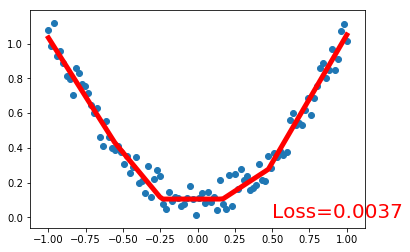

In [31]:
import matplotlib.pyplot as plt

plt.ion()  
plt.show()

for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)